<a href="https://colab.research.google.com/github/Cociancich/numerical_analysis_2025-2026/blob/main/exercise_sessions/Interpolation_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation
In many real-world scenarios, we only have measurements at a few points. Interpolation allows us to **reconstruct a smooth function** passing through those points. Here we explore classical approaches and observe their strengths and limitations.

## Problem statement
We consider a collection of $n+1$ data points ${(x_i,y_i)}_{i=0}^{n}$, and we want to find a polynomial function $p(x)$ such that $p(x_i)=y_i$.
Assuming the data points are generated by a function $y(x)$, the _interpolating polynomial_ can be used to estimate the values of $y(x)$ for $x\neq x_i$.
Having $n+1$ degrees of freedom, the polynomial model to represent the data will be of degree $n$.

In a more abstract setting, this operation amounts to approximating a general function $f$, from an infinitely dimensional function space $V$, with a simpler function $p$, taken in a finite-dimensional subspace $V_n\subset V$.

Having fixed a basis for the subspace $V_n$, be it ${\phi_i(x)}_{i=0}^{n}$, we can express $p(x)$ as a linear combinantion of basis functions with $n+1$ unknown coefficients:
$$
p(x) = \sum_{j=0}^{n} c_j \phi_j(x).
$$

The interpolation condition, $p(x_i)=y_i$, imposes therefore a set on $n+1$ linear constraints:
$$
\sum_{j=0}^{n} c_j \phi_j(x_i) = y_i,\quad\text{for $i=0,1,\ldots,n$},
$$
which can be expressed in matrix form as $Ac = y$ with
$$
A =
\begin{bmatrix}
\phi_0(x_0)	& \phi_1(x_0) & \cdots & \phi_n(x_0)\\
\phi_0(x_1)	& \phi_1(x_1) & \cdots & \phi_n(x_1)\\
\vdots		& \vdots 	  & 		& \vdots \\
\phi_0(x_n)	& \phi_1(x_n) & \cdots & \phi_n(x_n)
\end{bmatrix},\quad
c =
\begin{bmatrix}
c_0 \\c_1\\ \vdots \\ c_n
\end{bmatrix},\quad
y =
\begin{bmatrix}
y_0 \\ y_1 \\ \vdots \\ y_n
\end{bmatrix}.
$$

## Polynomial interpolation

For _polynomial interpolation_ there are some choices for the basis functions:
- Monomial;
- Lagrange;
- Newton.

For more general interpolation problems one could also chose different basis functions, such as trigonometric, exponentials, rationals, wavelets,...

### Monomial basis

In this case $\phi_j(x) = x^j$.

#### Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 5
X = np.linspace(0, 1, n+1)
x = np.linspace(-0.1, 1.1, 200)

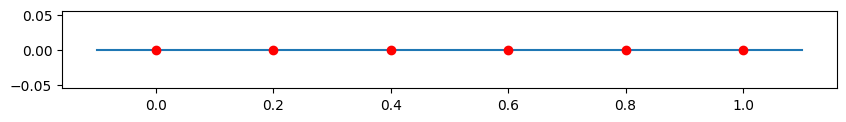

In [3]:
fig, ax = plt.subplots(figsize=(10, 1))
ax.plot(x, 0*x)
ax.plot(X, 0*X, 'ro')

In [4]:
def monomial_basis(i, x):
	"""
	Compute the i-th monomial basis function at x.
	"""
	return x**i

<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2173200017.py:9: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel('$\phi_i(x)$')


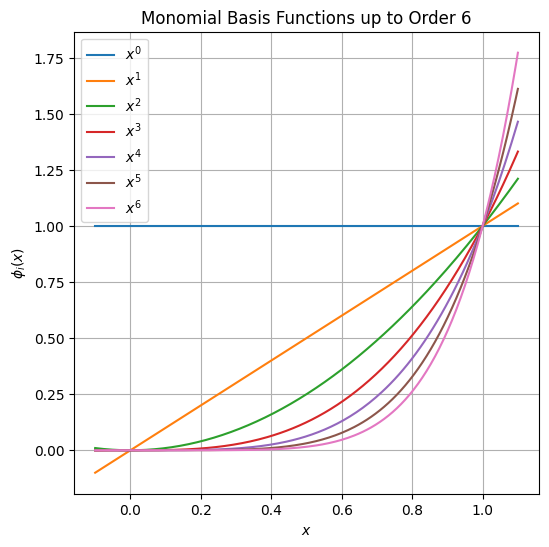

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))

for i in range(7):
	ax.plot(x, monomial_basis(i, x), label=f'$x^{i}$')

ax.legend()
ax.set_title('Monomial Basis Functions up to Order 6')
ax.set_xlabel('$x$')
ax.set_ylabel('$\phi_i(x)$')
ax.grid()
plt.show()

#### The Vandermonde matrix
With this choice of basis functions, entries of the matrix $A$ are
$$
a_{i,j} = x_i^j;
$$
this particular matrix appears often and is called _Vandermonde matrix_ and is known to be very poorly conditioned.

In [6]:
# Let's build the Vandermonde matrix
def myVander(X):
	"""
	Construct the Vandermonde matrix for x with n+1 columns.
	"""

	n = len(X) - 1
	A = np.zeros([n+1, n+1])

	for i in range(n+1):
		for j in range(n+1):
			A[i, j] = X[i]**j

	return A

#### Example
Let us approximate the function $f(x)=x(x-1)(x+2)(x+\pi/10)(x-0.5)$, having uniformly spaced data points in $[-1,1]$, using monomial basis.

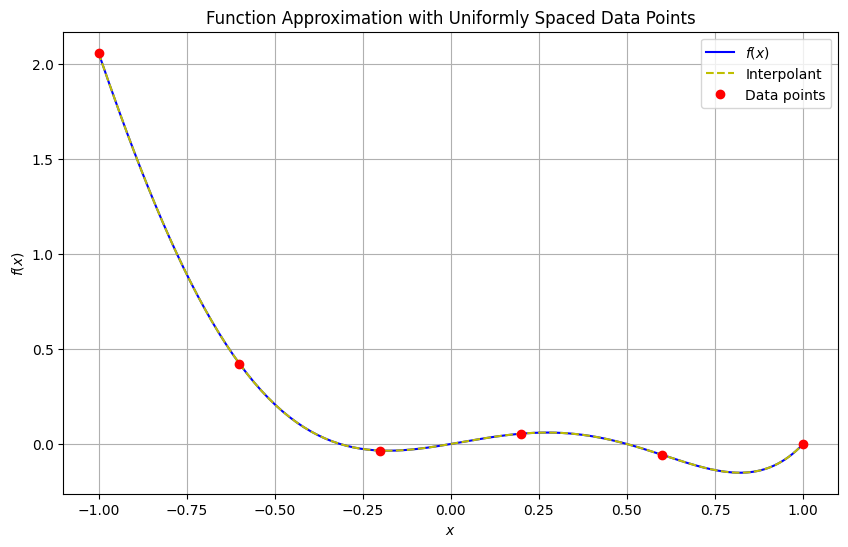

In [8]:
# Define the function to approximate
def f(x):
	return x * (x - 1) * (x + 2) * (x + np.pi / 10) * (x - 0.5)

# Generate uniformly spaced data points in [-1, 1]
n = 5
X = np.linspace(-1, 1, n + 1)
x = np.linspace(X[0], X[-1], 200)
Y = f(X)

# Compute coefficients of the interpolant
A = myVander(X)
c = np.linalg.solve(A, Y)

# Evaluate the interpolant p, given the coefficients, using the monomial_basis function
p = []
for point in x:
	B = np.array([monomial_basis(j, point) for j in range(n+1)])
	p_point = B@c
	p.append(p_point)
p = np.array(p)

# Plot the function and the data points
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, f(x), 'b-', label='$f(x)$', markevery=10)
ax.plot(x, p, 'y--', label='Interpolant', markevery=7)
ax.plot(X, Y, 'ro', label='Data points')
ax.legend()
ax.set_title('Function Approximation with Uniformly Spaced Data Points')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid()
plt.show()

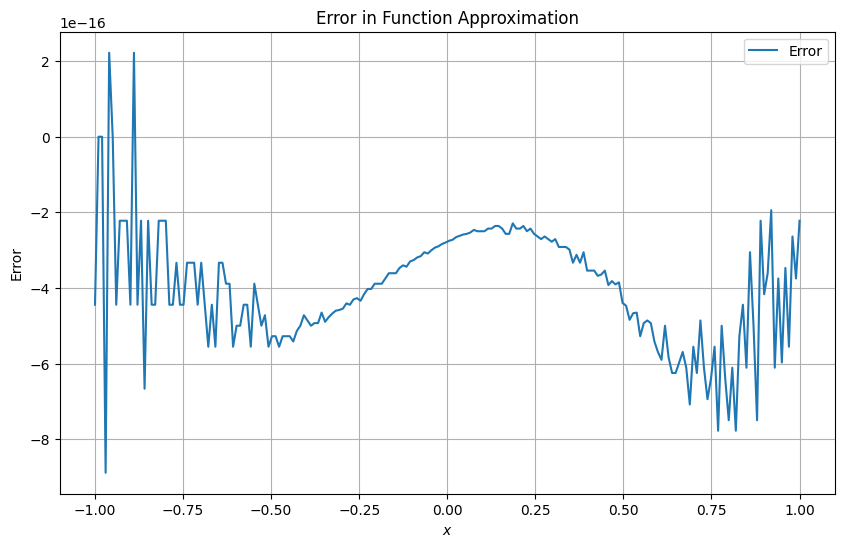

In [9]:
# Compute the error
error = f(x) - p

# Plot the error
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, error, label='Error')
ax.legend()
ax.set_title('Error in Function Approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('Error')
ax.grid()
plt.show()

#### Monomial interpolation function

In [10]:
# Definition of a function that fits our data points (X, Y) and interpolates new data x.
def monomial_interp(X, Y, x):
	"""
	Compute the interpolant of the data (X, Y) evaluated at x by monomial interpolation.

    Input
    --------------
    X, Y: coordinates of the training data
    x: coordinates of the testing data

    Output
    --------------
    interpolant evaluated at the points x
    Vandermonde matrix
	"""
	n = len(X) - 1
	A = myVander(X)
	c = np.linalg.solve(A, Y)
	B = np.array([[monomial_basis(j, point) for j in range(n+1)] for point in x])

	return B@c, A

#### Example
Let us approximate the function $f(x)=\sin(2\pi x)$ on $[0,1]$, still using the monomial interpolation.

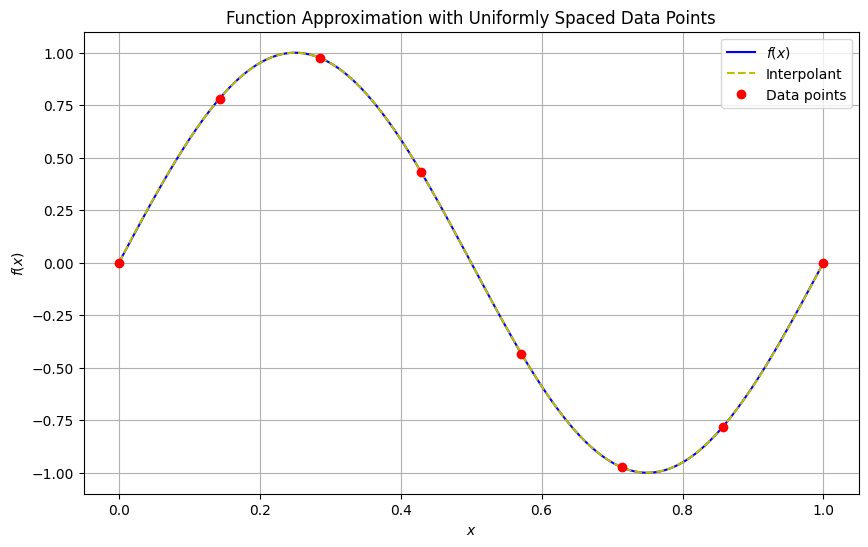

Maximum error: 0.0016945739322072606


In [11]:
# Define the function to approximate
def f(x):
	return np.sin(2*np.pi*x)

# Generate uniformly spaced data points in [0, 1]
n = 7
X = np.linspace(0, 1, n + 1)
x = np.linspace(X[0], X[-1], 200)
Y = f(X)

# Evaluate the interpolant
p, A = monomial_interp(X, Y, x)

# Plot the function and the data points
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, f(x),'b-', label='$f(x)$', markevery=10)
ax.plot(x, p, 'y--', label='Interpolant', markevery=7)
ax.plot(X, Y, 'ro', label='Data points')
ax.legend()
ax.set_title('Function Approximation with Uniformly Spaced Data Points')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid()
plt.show()

# Compute the error
error = abs(f(x) - p)
print(f'Maximum error: {max(error)}')

#### Runge's phenomenon
A particularly interesting example is given by the approximation of the runge function:
$$
f(x) = \frac{1}{1+100 x^2},\quad x \in [-1,1]
$$

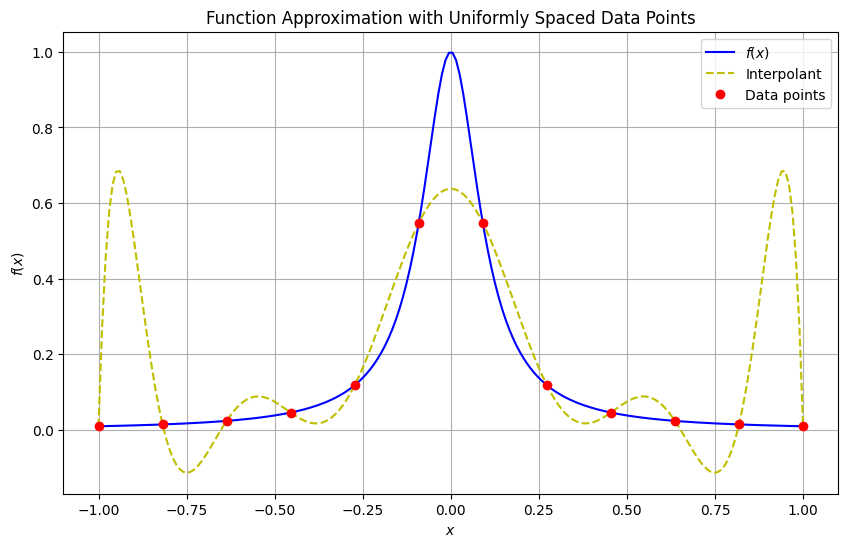

Maximum error: 1.2409618279221002
40754.88184170268


In [14]:
# Define the Runge function
def runge(x):
	return 1 / (1 + 100 * x**2)

# Generate uniformly spaced data points in [-1, 1]
n = 11
X = np.linspace(-1, 1, n + 1)
x = np.linspace(X[0], X[-1], 200)
Y = runge(X)

# Interpolate
p, A = monomial_interp(X, Y, x)

# Plot the function and the data points
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, runge(x), 'b-', label='$f(x)$')
ax.plot(x, p, 'y--', label='Interpolant')
ax.plot(X, Y, 'ro', label='Data points')
ax.legend()
ax.set_title('Function Approximation with Uniformly Spaced Data Points')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid()
plt.show()

# Compute the error
error = abs(f(x) - p)
print(f'Maximum error: {max(error)}')
print(np.linalg.cond(A))

Other examples are the function $|x|$ and the Heaviside function.

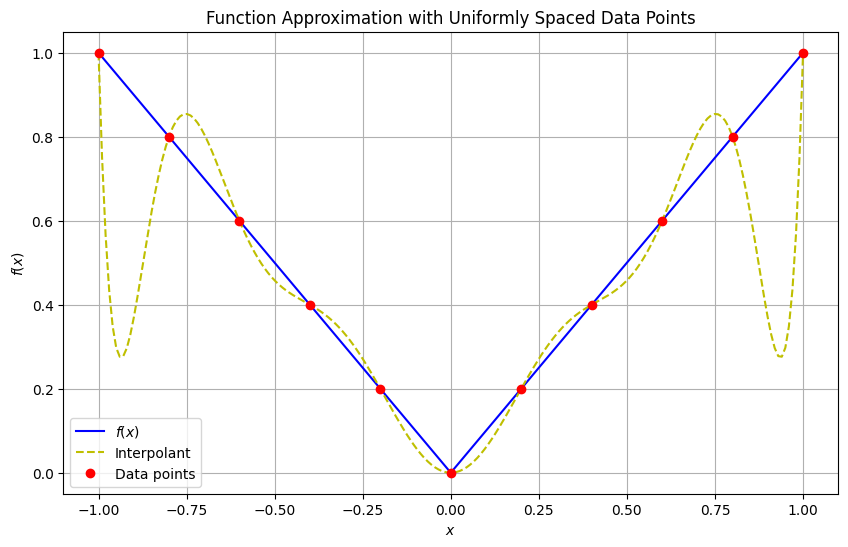

Maximum error: 1.8540455061611432


In [15]:
# Generate uniformly spaced data points in [-1, 1]
n = 10
X = np.linspace(-1, 1, n + 1)
x = np.linspace(X[0], X[-1], 200)
Y = abs(X)

# Interpolate
p, A = monomial_interp(X, Y, x)

# Plot the function and the data points
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, abs(x), 'b-', label='$f(x)$')
ax.plot(x, p, 'y--', label='Interpolant')
ax.plot(X, Y, 'ro', label='Data points')
ax.legend()
ax.set_title('Function Approximation with Uniformly Spaced Data Points')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid()
plt.show()

# Compute the error
error = abs(f(x) - p)
print(f'Maximum error: {max(error)}')

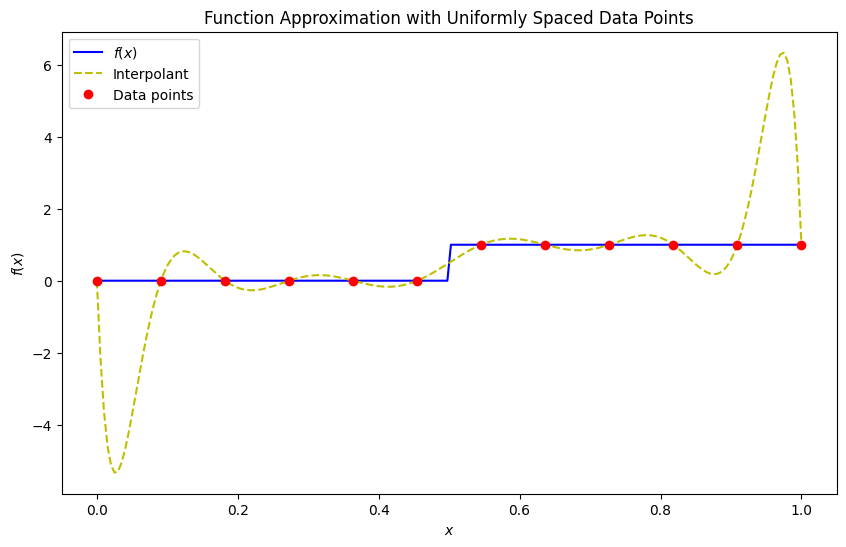

Maximum error: 6.496421066349438


In [17]:
# Define the Heaviside function
def step(x):
	return np.heaviside(x-0.5, 1)

# Generate uniformly spaced data points in [-1, 1]
n = 11
X = np.linspace(0, 1, n + 1)
x = np.linspace(X[0], X[-1], 200)
Y = step(X)

# Interpolate
p,A = monomial_interp(X, Y, x)

# Plot the function and the data points
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, step(x), 'b-', label='$f(x)$')
ax.plot(x, p, 'y--', label='Interpolant')
ax.plot(X, Y, 'ro', label='Data points')
ax.legend()
ax.set_title('Function Approximation with Uniformly Spaced Data Points')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
plt.show()

# Compute the error
error = abs(f(x) - p)
print(f'Maximum error: {max(error)}')

In [18]:
np.linalg.cond(A)

np.float64(883478686.4514534)

#### Conditioning of the Vandermonde matrix on equally spaced points

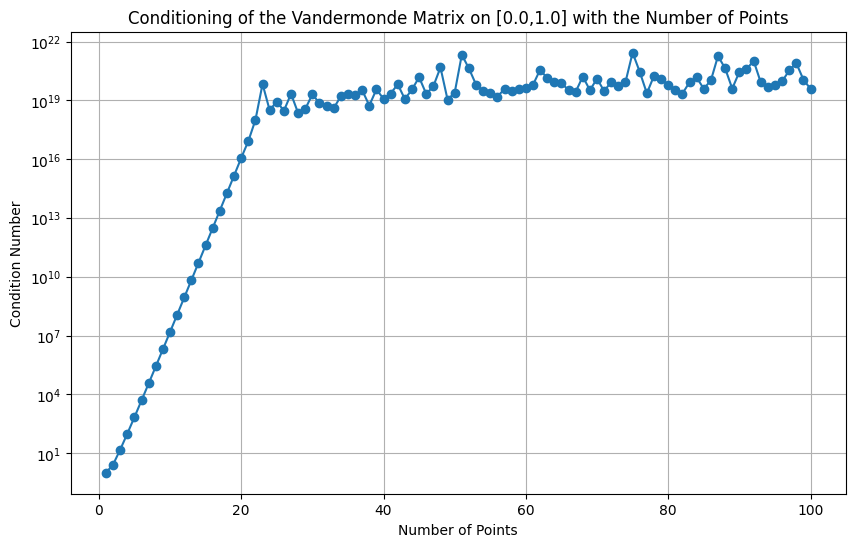

In [20]:
# Compute the condition numbers for different numbers of points
max_points = 100

condition_numbers = []

for n in range(1,max_points+1):
	X = np.linspace(0, 1, n)
	V = myVander(X)
	condition_numbers.append(np.linalg.cond(V))


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, max_points+1), condition_numbers, 'o-')
ax.set_yscale('log')
ax.set_title(f'Conditioning of the Vandermonde Matrix on [{X[0]},{X[-1]}] with the Number of Points')
ax.set_xlabel('Number of Points')
ax.set_ylabel('Condition Number')
ax.grid(True)
plt.show()

### Lagrangian interpolation

A suitable choice of basis functions allows to get a linear system with $A=I$. This basis is called Lagrange basis functions, and is defined as
$$
L_j(x) = \prod_{\begin{array}{c}\scriptsize i=0 \\ \scriptsize i\neq j\end{array}}^{n} \frac{x-x_i}{x_j -x_i}.
$$
With such choice of basis, there is no linear system to be solved, and the coefficients of the linear combination are the data points themselves, so that, with the notations used so far, we can express the interpolating polynomial as
$$
p(x) =\sum_{j=0}^{n} y_j L_j(x).
$$

In [23]:
# Let's build the j-th Lagrange basis from data X at a new given points x
def lagrange_basis(X, j, x):
	"""
	Compute the j-th Lagrange basis polynomial at x.
	"""
	n = len(X) - 1
	L = np.ones_like(x)
	for i in range(n+1):
		if i != j:
			L *= (x - X[i]) / (X[j] - X[i])
	return L

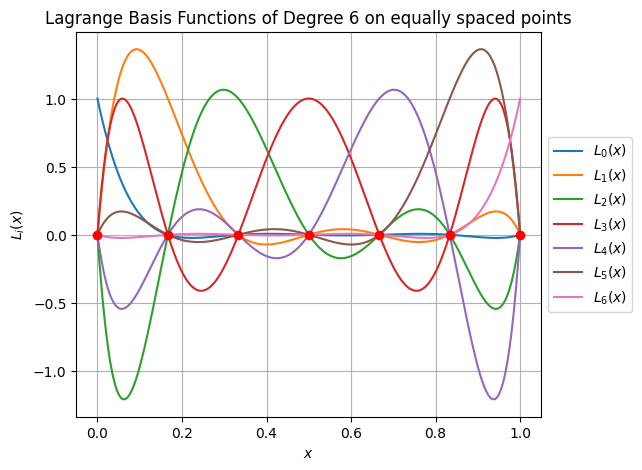

In [24]:
deg = 6
X = np.linspace(0, 1, deg + 1)
x = np.linspace(X[0], X[-1], 200)

fig, ax = plt.subplots(figsize=(6, 5))

for i in range(deg+1):
	ax.plot(x, lagrange_basis(X, i, x), label=f'$L_{i}(x)$')

ax.plot(X, 0*X, 'ro')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title(f'Lagrange Basis Functions of Degree {deg} on equally spaced points')
ax.set_xlabel('$x$')
ax.set_ylabel('$L_i(x)$')
ax.grid()
plt.show()

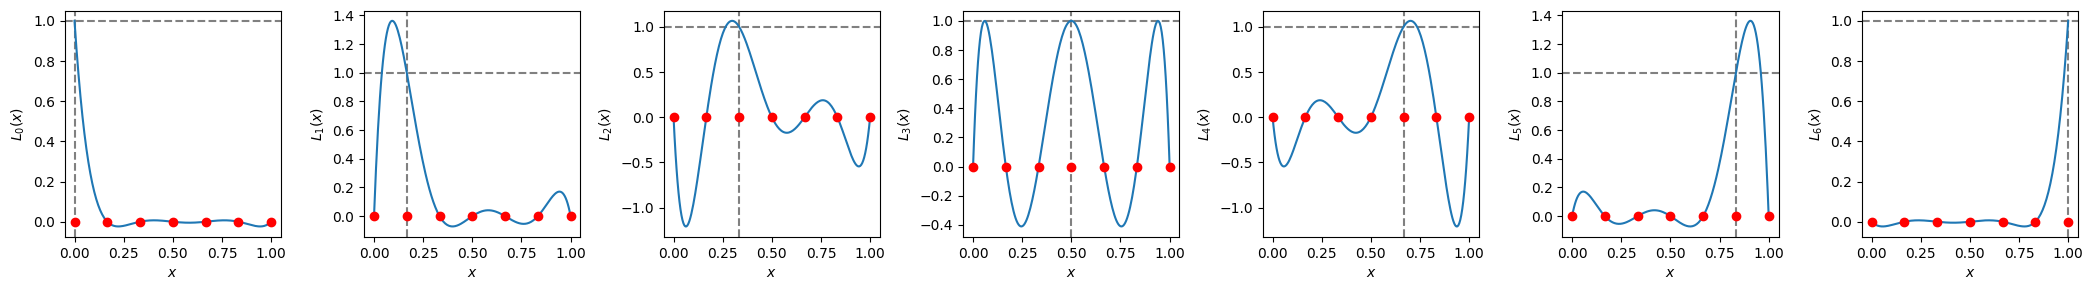

In [25]:
fig, axs = plt.subplots(1, deg + 1, figsize=(3*(deg + 1), 3))

for i in range(deg + 1):
	axs[i].axhline(y=1, color='gray', linestyle='--')
	axs[i].axvline(x=X[i], color='gray', linestyle='--')
	axs[i].plot(x, lagrange_basis(X, i, x), label=f'$L_{i}(x)$')
	axs[i].plot(X, 0 * X, 'ro')
	axs[i].set_xlabel('$x$')
	axs[i].set_ylabel(f'$L_{i}(x)$')

plt.tight_layout()
plt.show()

#### Lagrange interpolation function

In [ ]:
def lagrange_interp(X, Y, x):
	"""
	Compute the Lagrange interpolant of the data (X, Y) evaluated at x.
	"""
	n = len(X) - 1
	p = np.zeros_like(x)
	# complete here
	return p

#### Does this solve Runge's phenomenon?

In [ ]:
# Generate uniformly spaced data points in [-1, 1]
n = 5	# polynomial degree of the interpolant

X = np.linspace(-1, 1, n + 1)
x = np.linspace(X[0], X[-1], 200)
Y = runge(X)

# Interpolate
p = lagrange_interp(X, Y, x)

# Plot the function and the data points
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, runge(x), 'b-', label='$f(x)$')
ax.plot(x, p, 'y--', label='Interpolant')
ax.plot(X, Y, 'ro', label='Data points')
ax.legend()
ax.grid()
ax.set_title(f'Approximation of Runge function on {n+1} uniformly spaced data points')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
plt.show()

# Compute the error
error = abs(runge(x) - p)
print(f'Maximum error: {max(error)}')

In [ ]:
# Define the error computation function
def compute_error(n, fun=runge):
	X = np.linspace(-1, 1, n + 1)
	Y = fun(X)
	x = np.linspace(-1, 1, 200)
	p = lagrange_interp(X, Y, x)
	error = abs(fun(x) - p)
	return max(error)

# Compute the errors for different values of n
max_n = 30
errors_runge = [compute_error(n-1) for n in range(1, max_n + 1)]
errors_abs = [compute_error(n-1, fun=abs) for n in range(1, max_n + 1)]

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_n + 1), errors_runge, marker='o', label='runge')
plt.plot(range(1, max_n + 1), errors_abs, marker='o', label='abs')
plt.legend()
plt.yscale('log')
plt.xlabel('Number of Points (n)')
plt.ylabel('Maximum Error')
plt.title('Maximum Error in Lagrange Interpolation of Runge Function')
plt.grid(True)
plt.show()

## Lebesgue constants and Chebyshev nodes

From the theory, we know that

### **Theorem (Interpolation Error, [Cauchy 1840])**

Let $f \in \mathcal{C^{n+1}}([a,b])$ and suppose $x_0,x_1,\ldots,x_n \in [a,b]$ are $n+1$ distinct points.
Let $p_n$ be the (unique) polynomial such that $p_n(x_i) = f(x_i)$ for $i=0,1,\ldots,n$.

Then
$$
E_n[f](x) := f(x) - p_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!}\prod_{i=0}^{n} (x-x_i),
$$
where $\xi \in (\min_{i=0,\ldots,n}\{x_i\},\max_{i=0,\ldots,n}\{x_i\})$.

#### _From the expression, what can we do to improve the accuracy of our interpolation?_ **Choose wisely the data points to minimize** $\prod_{i=0}^{n} (x-x_i)$.

There is one special number, named **Lebesgue constant** $\Lambda_n$, that allows to measure if our interpolation is good or not.
In particular:

$$
\|f - p_n\| \leq (1+\Lambda_n)\text{inf}_{q \in P^n}\|f-q\|
$$

We define before the **Lebesgue function** relative to the $n+1$ point interpolation as
$$
	\lambda_n(x):=\sum_{j=0}^{n} \vert L_j(x)\vert
$$
Then, the Lebesgue constant is defined as the maximum of the Lebesgue function:
$$
\Lambda_n = \max_{x \in [a,b]} \lambda_n(x)
$$

In [ ]:
def lebesgue_function(X, x):
	"""
	Compute the Lebesgue function evaluated at x for the data points X.
	"""
	deg = len(X) - 1
	L = np.zeros_like(x)
	for j in range(deg+1):
		L += abs(lagrange_basis(X, j, x))
	return L

def lebesgue_constant(X):
	"""
	Compute the Lebesgue constant for the data points X.
	"""
	x = np.linspace(X[0], X[-1], 200)
	L = lebesgue_function(X, x)
	return max(L)

In [ ]:
n = 5
X = np.linspace(-1, 1, n + 1)
x = np.linspace(X[0], X[-1], 200)
plt.plot(x, lebesgue_function(X, x))

In [ ]:
# What is the Lebesgue constant if we consider equispaced points? We can try to plot the Lebesgue constant vs the number of points considered.

### Chebyshev-Lobatto points

**Bernstein's Theorem**

For every function $f \in \mathcal{C}^{1}([a,b])$, $-\infty < a < b < +\infty$, if $p_n$ is the interpolant of $f$ at $n+1$ Chebyshev nodes, then $\Vert f - p_n \Vert _{\infty} \to  0$ as $n\to\infty$.

The **Chebyshev nodes** on the interval $(-1,1)$ are obteined projecting points from the unit half-circle on the horizontal axis:

![image.png](attachment:image.png)

In [ ]:
def chebyshev_nodes(n, a=-1, b=1, kind=1):
	"""
	Compute the Chebyshev nodes in the interval [a, b].
	"""

	if kind == 1:
		theta_k = [(2*k+1)*np.pi/(2*n) for k in range(n)]
	if kind == 2:
		theta_k = [k*np.pi/(n-1) for k in range(n)]

	nodes = 0.5*(a+b) + 0.5*(b-a)*np.cos(theta_k)

	return np.array(nodes)

In [ ]:
chebyshev_nodes(3, kind=2)

In [ ]:
# Define the number of Chebyshev nodes
n = 5

# Compute the Chebyshev nodes
kind = 2
nodes = chebyshev_nodes(n, kind=kind)

# Define the unit circle
theta = np.linspace(0, np.pi, 200)
if kind == 1:
	theta_nodes = [(2*k+1)*np.pi/(2*n) for k in range(n)]
if kind == 2:
	theta_nodes = [k*np.pi/(n-1) for k in range(n)]

circle_x = np.cos(theta)
circle_y = np.sin(theta)
nodes_y = np.sin(theta_nodes)

# Plot the unit circle and Chebyshev nodes
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(circle_x, circle_y,'b--')
ax.plot(nodes, nodes_y, 'bo')
ax.plot(nodes, np.zeros_like(nodes), 'ro', label='Chebyshev Nodes')
ax.set_aspect('equal')
ax.legend()
ax.set_title('Unit Circle and Chebyshev Nodes')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xticks(nodes)
plt.grid(True)
plt.show()

We can see that on these nodes, the Lebesgue constants are lower:

In [ ]:
n = 5
X = chebyshev_nodes(n+1)
x = np.linspace(X[0], X[-1], 200)
plt.plot(x,lebesgue_function(X, x))

In [ ]:
max_n = 100

# Compute the Lebesgue constants for equally spaced and Chebyshev nodes
lebesgue_constants_equally_spaced = [lebesgue_constant(np.linspace(-1, 1, n + 1)) for n in range(1, max_n + 1)]
lebesgue_constants_chebyshev = [lebesgue_constant(chebyshev_nodes(n+1)) for n in range(1, max_n + 1)]

# Plot the Lebesgue constants
plt.figure(figsize=(10, 6))
#plt.plot(range(1, max_n + 1), lebesgue_constants_equally_spaced, marker='o', label='Equally Spaced Nodes')
#plt.plot(range(10, max_n + 1), [2**(n)/n*np.log(n) for n in range(10, max_n + 1)], label=r'O($2^n/n$ log(n))')
plt.plot(range(1, max_n + 1), lebesgue_constants_chebyshev, marker='o', label='Chebyshev Nodes')
plt.plot(range(1, max_n + 1), [2/np.pi*np.log(n) for n in range(1, max_n + 1)], label=r'O($2/\pi$ log(n))')

plt.yscale('log')
plt.xlabel('Polynomial degree')
plt.ylabel('Lebesgue Constant')
plt.title('Lebesgue Constant for Equally Spaced and Chebyshev Nodes')
plt.legend()
plt.grid(True)
plt.show()

### Runge example again: is the interpolation ok now?

In [ ]:
# Generate uniformly spaced data points in [-1, 1]
n = 50 # polynomial degree of the interpolant

X = chebyshev_nodes(n+1)
x = np.linspace(X[0], X[-1], 200)
Y = runge(X)

# Interpolate
p = lagrange_interp(X, Y, x)

# Plot the function and the data points
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, runge(x), 'b-', label='$f(x)$')
ax.plot(x, p, 'y--', label='Interpolant')
ax.plot(X, Y, 'ro', label='Data points')
ax.legend()
ax.set_title(f'Approximation of Runge function on {n+1} Chebyshev data points')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
plt.show()

### Comparison
Let us now see the behaviour of the interpolation operator on Chebyshev nodes on different functions

In [ ]:
# Define the error computation function
def compute_error(n, fun=runge):
	X = chebyshev_nodes(n+1)
	Y = fun(X)
	x = np.linspace(-1, 1, 200)
	p = lagrange_interp(X, Y, x)
	error = abs(fun(x) - p)
	return max(error)

# Compute the errors for different values of n
max_n = 100
errors_sin = [compute_error(n, np.sin) for n in range(1, max_n + 1)]
errors_runge = [compute_error(n) for n in range(1, max_n + 1)]
errors_abs = [compute_error(n, abs) for n in range(1, max_n + 1)]

# Plot the errors
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_n + 1), errors_sin, marker='o',label='sin')
plt.plot(range(1, max_n + 1), errors_runge, marker='o',label='runge')
plt.plot(range(1, max_n + 1), errors_abs, marker='o',label='abs')
plt.yscale('log')
plt.xlabel('Degree (n)')
plt.ylabel('Maximum Error')
plt.title('Maximum Error in Lagrange Interpolation of Runge Function')
plt.grid(True)
plt.legend()
plt.show()